# Appendix

# Appendix 1 Data Import

## A.1

Import all libraries needed

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from pandas_profiling import ProfileReport


Pull in data from csv file called 'MortalityData.xlsx'. The excel spreadsheet contains many sheets of data and different tables within sheets- these will be pulled into different dataframes.

In [2]:
# Sheet 1: Weekly provisional figures on deaths registered in England and Wales, 
# registered 2022 and 2023, with five-year averages
Deaths2022and2023 = pd.read_excel('MortalityData.xlsx',sheet_name = 3,header = 5)


# Sheet 2: Weekly provisional figures on deaths registered in England and Wales by sex and age group, 
#registered 2023
Age2023_person = pd.read_excel('MortalityData.xlsx',sheet_name = 4,header = 6,nrows=9)
Age2023_male = pd.read_excel('MortalityData.xlsx',sheet_name = 4,header = 18,nrows=9)
Age2023_female = pd.read_excel('MortalityData.xlsx',sheet_name = 4,header = 30,nrows=9)


#Sheet 3: Weekly provisional figures on deaths registered in England and Wales for selected causes of death, 
#registered 2023
Cause = pd.read_excel('MortalityData.xlsx',sheet_name = 5,header = 5,nrows= None)


# Sheet 4: Weekly provisional figures on deaths involving COVID-19 registered in England and Wales 
# by sex and age group, registered 2023
CovidAge2023_person = pd.read_excel('MortalityData.xlsx',sheet_name = 6,header = 6,nrows=9)
CovidAge2023_male = pd.read_excel('MortalityData.xlsx',sheet_name = 6,header = 18,nrows=9)
CovidAge2023_female = pd.read_excel('MortalityData.xlsx',sheet_name = 6,header = 30,nrows=9)


# Sheet 5: Weekly provisional figures on death occurrences involving COVID-19 in England and Wales 
# by sex and age group, registered 2022 and 2023
CovidDeaths2022and2023_occurence_person = pd.read_excel('MortalityData.xlsx',sheet_name = 7,header = 6,nrows= 61)
CovidDeaths2022and2023_occurence_male = pd.read_excel('MortalityData.xlsx',sheet_name = 7,header = 70,nrows= 61)
CovidDeaths2022and2023_occurence_female = pd.read_excel('MortalityData.xlsx',sheet_name = 7,header = 134,nrows= 61)



# Sheet 6: Weekly provisional figures on death registrations involving COVID-19 in the UK, 
# registered 2023
UKDeaths2022and2023 = pd.read_excel('MortalityData.xlsx',sheet_name = 8,header = 5,nrows= None)


# Sheet 7: Weekly provisional figures on death registrations involving COVID-19 in the UK 
# by sex and age group, registered 2023
UKCovidAge2023_person = pd.read_excel('MortalityData.xlsx',sheet_name = 9,header = 6,nrows=9)
UKCovidAge2023_male = pd.read_excel('MortalityData.xlsx',sheet_name = 9,header = 18,nrows=9)
UKCovidAge2023_female = pd.read_excel('MortalityData.xlsx',sheet_name = 9,header = 30,nrows=9)


# Sheet 8: Daily provisional non-cumulative figures on death registrations involving COVID-19 
# in the UK and by English region, registered 2022 and 2023
Region2022and2023 = pd.read_excel('MortalityData.xlsx',sheet_name = 10,header = 5,nrows= None)


# Sheet 9: Daily provisional non-cumulative figures on death occurrences involving COVID-19
# in the UK and by English region, occurring 2022 and 2023
Region2022and2023_Covid = pd.read_excel('MortalityData.xlsx',sheet_name = 11,header = 5,nrows= None)


# Sheet 10: Weekly provisional figures on excess death registrations in England and Wales 
# by place of occurrence, registered between week ending 6 January 2023 and 3 March 2023
ExcessDeathsbyPlace = pd.read_excel('MortalityData.xlsx',sheet_name = 12,header = 5,nrows= None)


# Sheet 11: Experimental estimated total death occurrences per week in England and Wales 
# based on a statistical model, occurring 2023
Model = pd.read_excel('MortalityData.xlsx',sheet_name = 13,header = 6,nrows= None)


# Sheet 12a: Weekly provisional figures on death registrations for all causes and involving COVID-19 
# in England and Wales by region of usual residence, registered 2023
RegionAllCause = pd.read_excel('MortalityData.xlsx',sheet_name = 14,header = 6,nrows=9)
RegionAllCauseCOVID = pd.read_excel('MortalityData.xlsx',sheet_name = 14,header = 18,nrows=9)


# Sheet 12b: Weekly provisional figures on death occurrences involving COVID-19 in England and Wales 
# by region of usual residence, registered 2022 and 2023
CovidDeaths2022and2023Places_occurence = pd.read_excel('MortalityData.xlsx',sheet_name = 15,header = 6,nrows= None)


# Sheet 13: Weekly provisional figures on death registrations in England and Wales by place of occurrence,  
# registered between week ending 3 January 2020 and week ending 3 March 2023, including weekly breakdown for 2023
Deaths2020to2023_EngandWales = pd.read_excel('MortalityData.xlsx',sheet_name = 16,header = 6,nrows= 10)
Deaths2020to2023_Engand = pd.read_excel('MortalityData.xlsx',sheet_name = 16,header = 19,nrows= 10)
Deaths2020to2023_Wales = pd.read_excel('MortalityData.xlsx',sheet_name = 16,header = 32,nrows= 10)


#Sheet 14: Weekly provisional figures on death registrations involving COVID-19 in England and Wales 
# by place of occurrence, registered between week ending 3 January 2020 and week ending 3 March 2023, 
# including weekly breakdown for 2023
Deaths2020to2023Covid_EngandWales = pd.read_excel('MortalityData.xlsx',sheet_name = 17,header = 6,nrows= 10)
Deaths2020to2023Covid_Eng = pd.read_excel('MortalityData.xlsx',sheet_name = 17,header = 19,nrows= 10)
Deaths2020to2023Covid_Wales = pd.read_excel('MortalityData.xlsx',sheet_name = 17,header = 32,nrows= 10)

# Appendix 2 Define functions for wrangling

## A2.1

Population wrangling for Age/Sex pyramids

In [3]:
def population_wrangling(sex):
    sex_population_wrangling = sex.iloc[8]
    sex_population_wrangling = pd.DataFrame(sex_population_wrangling)
    if 'Week number' in sex_population_wrangling.index:
            sex_population_wrangling = sex_population_wrangling.drop(labels=["Week number"])
    if 'Week ending' in sex_population_wrangling.index:
            sex_population_wrangling = sex_population_wrangling.drop(labels=["Week ending"])       
    if 'All ages' in sex_population_wrangling.index:
            sex_population_wrangling = sex_population_wrangling.drop(labels=["All ages"])        
    sex_population_wrangling.index.name = "Age"
    sex_population_wrangling.columns = ["Deaths"]
    sex_population_wrangling.reset_index(inplace=True)
    if "Sex" in sex_population_wrangling["Age"].values:
        sex_population_wrangling = sex_population_wrangling[~(sex_population_wrangling["Age"] == "Sex")]

    sex_population = sex_population_wrangling
    
    return sex_population


Wrangling for pie charts

In [4]:
def population_wrangling_pie(dataframe):
    Pie_df = dataframe[dataframe['Week number'] == 9]
    Pie_df = Pie_df[['All ages', 'Sex']]
    
    return Pie_df


Pie chart

In [5]:
def piefunc(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


# Appendix 3 Data Wrangling

## A3.1

### Sheet 1: Weekly provisional figures on deaths registered in England and Wales, registered 2022 and 2023, with five-year averages

In [6]:
Deaths2022and2023.head()

Week number Week ended  Total deaths England and Wales (2023)  \
0            1 2023-01-06                                  14983   
1            2 2023-01-13                                  17381   
2            3 2023-01-20                                  15804   
3            4 2023-01-27                                  14137   
4            5 2023-02-03                                  13412   

   Total deaths England and Wales (2022)  \
0                                  12257   
1                                  13309   
2                                  12777   
3                                  12396   
4                                  11860   

   Five-year average, England and Wales (2017 to 2019 and 2021, 2022)  \
0                                              13136                    
1                                              14544                    
2                                              14236                    
3                                              13878                    
4                                              13226                    

   Total deaths England (2023)  Total deaths England (2022)  \
0                        13976                        11466   
1                        16158                        12401   
2                        14798                        12012   
3                        13290                        11649   
4                        12580                        11136   

   Five-year average, England (2017 to 2019 and 2021, 2022)  \
0                                              12270          
1                                              13597          
2                                              13365          
3                                              13022          
4                                              12420          

   Total deaths Wales (2023)  Total deaths Wales (2022)  \
0                        979                        776   
1                       1183                        885   
2                        974                        744   
3                        816                        729   
4                        807                        705   

   Five-year average, Wales (2017 to 2019 and 2021, 2022)  
0                                                844       
1                                                919       
2                                                845       
3                                                834       
4                                                783

Data Exploration:

In [7]:
# Check missing values

Deaths2022and2023.isnull().sum().sum()

0

In [8]:
#summarize the dataset

profile1 = ProfileReport(Deaths2022and2023, title="Pandas Profiling Report")
profile1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## A3.2

### # Sheet 2: Weekly provisional figures on deaths registered in England and Wales by sex and age group, registered 2023

For this dataset we need to combine the dataframes for sexes. For this we need to add a column for Sex.

In [9]:
Age2023_person['Sex'] = 'Person'
Age2023_male['Sex'] = 'Male'
Age2023_female['Sex'] = 'Female'

Age2023 = [Age2023_person, Age2023_male, Age2023_female]
Age2023 = pd.concat(Age2023)

In [10]:
Age2023.head()

Week number Week ending  All ages  <1  01-04  05-09  10-14  15-19  20-24  \
0            1  2023-01-06     14983  44      4      5      5     15     24   
1            2  2023-01-13     17381  55     12      4      8     14     30   
2            3  2023-01-20     15804  50      9      4      8     18     14   
3            4  2023-01-27     14137  56      5      5      8     11     20   
4            5  2023-02-03     13412  59     11      5      6     23     21   

   25-29  ...  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89   90+  \
0     21  ...    246    440    688    842   1283   1960   2475   2856  3709   
1     42  ...    352    492    754   1023   1586   2290   2804   3184  4252   
2     37  ...    329    500    703    940   1423   2104   2511   2923  3705   
3     38  ...    346    483    641    882   1294   1884   2231   2583  3185   
4     39  ...    266    454    641    872   1137   1836   2156   2427  3008   

      Sex  
0  Person  
1  Person  
2  Person  
3  Person  
4  Person  

[5 rows x 24 columns]

In [11]:
Deaths2022and2023.isnull().sum().sum()

0

### Wrangling

In [12]:
male_population_wrangling = population_wrangling(Age2023_male)
Female_population_wrangling = population_wrangling(Age2023_female)

female_population_Age2023 = Female_population_wrangling['Deaths']
male_population_Age2023 = male_population_wrangling["Deaths"]
age_groups_Age2023 = male_population_wrangling["Age"]

In [13]:
Pie_Age2023 = population_wrangling_pie(Age2023)

## A3.3

#### Sheet 3: Weekly provisional figures on deaths registered in England and Wales for selected causes of death, registered 2023


In [14]:
Cause.head()

Week number Week ending  \
0            1  2023-01-06   
1            2  2023-01-13   
2            3  2023-01-20   
3            4  2023-01-27   
4            5  2023-02-03   

   Deaths involving diseases of the respiratory system (J00 to J99)  \
0                                               6160                  
1                                               7122                  
2                                               6065                  
3                                               4837                  
4                                               4523                  

   Deaths due to diseases of the respiratory system (J00 to J99)  \
0                                               2923               
1                                               3317               
2                                               2717               
3                                               2089               
4                                               1876               

   Deaths involving influenza or pneumonia (J09 to J18)  \
0                                               3563      
1                                               4116      
2                                               3384      
3                                               2707      
4                                               2465      

   Deaths due to influenza or pneumonia (J09 to J18)  \
0                                               1383   
1                                               1473   
2                                               1207   
3                                                834   
4                                                725   

   Deaths involving COVID-19 (U07.1, U07.2, U09.9, U10.9)  \
0                                                739        
1                                                922        
2                                                781        
3                                                579        
4                                                499        

   Deaths due to COVID-19 (U07.1, U07.2, U10.9)  
0                                           532  
1                                           654  
2                                           562  
3                                           407  
4                                           332

In [15]:
Cause.isnull().sum().sum()

0

### Wrangling 

In [16]:
Cause_wrangling = Cause.transpose()
Cause_wrangling = Cause_wrangling.drop(labels = ["Week number","Week ending"])
Cause_wrangling.reset_index(inplace=True)
# New column names
new_column_names = ['Week number', '1', '2', '3', '4', '5', '6', '7', '8','9']
# Create a new dataframe with updated column names
Cause_final = pd.DataFrame(data=Cause_wrangling.values, columns=new_column_names)
                   



## A3.4

### Sheet 4: Weekly provisional figures on deaths involving COVID-19 registered in England and Wales by sex and age group, registered 2023


For this dataset we need to combine the dataframes for sexes. For this we need to add a column for Sex.

In [17]:
CovidAge2023_person['Sex'] = 'Person'
CovidAge2023_male['Sex'] = 'Male'
CovidAge2023_female['Sex'] = 'Female'

CovidAge2023 = [CovidAge2023_person, CovidAge2023_male, CovidAge2023_female]
CovidAge2023 = pd.concat(CovidAge2023)

In [18]:
CovidAge2023.head()

Week number Week ending  All ages  <1  01-04  05-09  10-14  15-19  20-24  \
0            1  2023-01-06       739   0      0      0      0      0      0   
1            2  2023-01-13       922   0      1      0      0      0      0   
2            3  2023-01-20       781   0      0      0      0      0      0   
3            4  2023-01-27       579   0      0      0      1      0      0   
4            5  2023-02-03       499   0      0      0      1      0      0   

   25-29  ...  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0      1  ...     10     14     28     24     62    112    134    139  208   
1      0  ...     16     17     25     45     77     96    140    227  266   
2      1  ...      9     20     23     33     43    110    136    166  227   
3      0  ...      6      6     15     21     41     68    117    150  146   
4      0  ...      4      9     14     30     30     68     96     97  139   

      Sex  
0  Person  
1  Person  
2  Person  
3  Person  
4  Person  

[5 rows x 24 columns]

In [19]:
CovidAge2023.isnull().sum().sum()

0

### Wrangling

In [20]:
CovidAge2023_male_wrangling = population_wrangling(CovidAge2023_male)
CovidAge2023_female_wrangling = population_wrangling(CovidAge2023_female)

CovidAge2023_female = CovidAge2023_female_wrangling['Deaths']
CovidAge2023_male = CovidAge2023_male_wrangling["Deaths"]
CovidAge2023_age_groups = CovidAge2023_male_wrangling["Age"]

In [21]:
Pie_CovidAge2023 = population_wrangling_pie(CovidAge2023)

## A3.5

### # Sheet 5: Weekly provisional figures on death occurrences involving COVID-19 in England and Wales by sex and age group, registered 2022 and 2023


For this dataset we need to combine the dataframes for sexes. For this we need to add a column for Sex.

In [22]:
CovidDeaths2022and2023_occurence_person['Sex'] = 'Person'
CovidDeaths2022and2023_occurence_male['Sex'] = 'Male'
CovidDeaths2022and2023_occurence_female['Sex'] = 'Female'

CovidDeaths2022and2023_occurence = [CovidDeaths2022and2023_occurence_person, CovidDeaths2022and2023_occurence_male, CovidDeaths2022and2023_occurence_female]
CovidDeaths2022and2023_occurence = pd.concat(CovidDeaths2022and2023_occurence)

In [23]:
CovidDeaths2022and2023_occurence.head()

Week number Week ending  All ages  <1  01-04  05-09  10-14  15-19  20-24  \
0            1  2022-01-07      1228   0      1      1      0      0      4   
1            2  2022-01-14      1467   3      0      0      1      2      2   
2            3  2022-01-21      1476   0      0      0      1      3      1   
3            4  2022-01-28      1315   0      0      0      0      1      2   
4            5  2022-02-04      1200   0      0      0      1      0      0   

   25-29  ...  50-54  55-59  60-64  65-69  70-74  75-79  80-84  85-89  90+  \
0      3  ...     36     42     77     90    133    167    194    191  231   
1      2  ...     41     41     73    108    118    198    203    292  339   
2      2  ...     30     39     61     84    142    171    249    286  372   
3      2  ...     22     39     64     58    115    161    226    299  293   
4      2  ...     19     25     57     70     92    167    209    251  287   

      Sex  
0  Person  
1  Person  
2  Person  
3  Person  
4  Person  

[5 rows x 24 columns]

In [24]:
CovidDeaths2022and2023_occurence.isnull().sum().sum()

0

### Wrangling

In [25]:
male_population_wrangling3 = population_wrangling(CovidDeaths2022and2023_occurence_male)
Female_population_wrangling3 = population_wrangling(CovidDeaths2022and2023_occurence_female)

female_population3 = Female_population_wrangling3['Deaths']
male_population3 = male_population_wrangling3["Deaths"]
age_groups3 = male_population_wrangling3["Age"]

## A3.6

### Sheet 6: Weekly provisional figures on death registrations involving COVID-19 in the UK, registered 2023

In [26]:
UKDeaths2022and2023.head()

Week number Week ending  Total deaths  England and Wales  England  Wales  \
0            1  2023-01-06           842                739      679     57   
1            2  2023-01-13          1060                922      849     70   
2            3  2023-01-20           882                781      711     69   
3            4  2023-01-27           660                579      545     33   
4            5  2023-02-03           540                499      469     29   

   Scotland  Northern Ireland  
0        84                19  
1       102                36  
2        84                17  
3        55                26  
4        30                11

In [27]:
UKDeaths2022and2023.isnull().sum().sum()

0

Wrangling

In [28]:
UKDeaths2022and2023_wrangling = UKDeaths2022and2023.transpose()
UKDeaths2022and2023_wrangling = pd.DataFrame(UKDeaths2022and2023_wrangling[8])
UKDeaths2022and2023_wrangling = UKDeaths2022and2023_wrangling.drop(labels = ["Week ending"])
UKDeaths2022and2023_wrangling = UKDeaths2022and2023_wrangling.drop(labels = ["Week number"])
UKDeaths2022and2023_wrangling = UKDeaths2022and2023_wrangling.drop(labels = ["England and Wales"])
UKDeaths2022and2023_wrangling = UKDeaths2022and2023_wrangling.drop(labels = ["Total deaths"])
UKDeaths2022and2023_wrangling.index.name = "Country"
UKDeaths2022and2023_wrangling.reset_index(inplace=True)
UKDeaths2022and2023_wrangling = pd.DataFrame(UKDeaths2022and2023_wrangling)
Country = UKDeaths2022and2023_wrangling["Country"].astype(str)
Deaths = UKDeaths2022and2023_wrangling[8].astype(float)

## A3.7

### Sheet 7: Weekly provisional figures on death registrations involving COVID-19 in the UK by sex and age group, registered 2023

For this dataset we need to combine the dataframes for sexes. For this we need to add a column for Sex.

In [29]:
UKCovidAge2023_person['Sex'] = 'Person'
UKCovidAge2023_male['Sex'] = 'Male'
UKCovidAge2023_female['Sex'] = 'Female'

UKCovidAge2023 = [UKCovidAge2023_person, UKCovidAge2023_male, UKCovidAge2023_female]
UKCovidAge2023 = pd.concat(UKCovidAge2023)

In [30]:
UKCovidAge2023.head()

Week number Week ending  <1  01-14  15-44  45-64  65-74  75-84  85+     Sex
0            1  2023-01-06   0      0      7     59    106    272  398  Person
1            2  2023-01-13   0      1      9     69    138    286  557  Person
2            3  2023-01-20   0      0     10     59     85    283  445  Person
3            4  2023-01-27   0      1      5     32     74    208  340  Person
4            5  2023-02-03   0      1      5     34     66    176  258  Person

In [31]:
UKCovidAge2023.isnull().sum().sum()

0

### Wrangling

In [32]:
UKCovidAge2023_wranglingMale = population_wrangling(UKCovidAge2023_male)
UKCovidAge2023_wranglingFemale = population_wrangling(UKCovidAge2023_female)

UKCovidAge2023_female = UKCovidAge2023_wranglingFemale['Deaths']
UKCovidAge2023_male = UKCovidAge2023_wranglingMale["Deaths"]
UKCovidAge2023_age = UKCovidAge2023_wranglingMale["Age"]

## A3.8

### Sheet 8: Daily provisional non-cumulative figures on death registrations involving COVID-19 in the UK and by English region, registered 2022 and 2023

In [33]:
Region2022and2023.head()

Date   UK  England and Wales  England  Wales  Scotland  \
0 2022-01-01    2                  2        2      0         0   
1 2022-01-02    4                  4        4      0         0   
2 2022-01-03    8                  7        7      0         0   
3 2022-01-04  220                203      195      7         8   
4 2022-01-05  231                197      183     13        24   

   Northern Ireland  North East  North West  Yorkshire and The Humber  \
0                 0           0           0                         0   
1                 0           0           1                         0   
2                 1           0           0                         0   
3                 9          12          34                        16   
4                10          13          30                        17   

   East Midlands  West Midlands  East of England  London  South East  \
0              0              0                1       1           0   
1              1              0                0       2           0   
2              1              1                4       1           0   
3             18             16               22      31          26   
4             13             12               22      34          21   

   South West  
0           0  
1           0  
2           0  
3          20  
4          21

In [34]:
Region2022and2023.isnull().sum().sum()

0

## A3.9

### Sheet 9: Daily provisional non-cumulative figures on death occurrences involving COVID-19 in the UK and by English region, occurring 2022 and 2023

In [35]:
Region2022and2023_Covid.head()

Date   UK  England and Wales  England  Wales  Scotland  \
0 2022-01-01  176                162      152     10        10   
1 2022-01-02  170                154      143     11        10   
2 2022-01-03  179                164      153     10         8   
3 2022-01-04  203                175      157     18        24   
4 2022-01-05  180                164      159      5        12   

   Northern Ireland  North East  North West  Yorkshire and The Humber  \
0                 4           5          28                        11   
1                 6           2          19                        15   
2                 7           8          24                        13   
3                 4           7          26                        11   
4                 4           7          31                        13   

   East Midlands  West Midlands  East of England  London  South East  \
0             16             14               15      33          20   
1             12             17               17      40          14   
2              9             15               17      30          19   
3             20             21               18      27          19   
4             14             12               27      24          20   

   South West  
0          10  
1           7  
2          18  
3           8  
4          11

In [36]:
Region2022and2023_Covid.isnull().sum().sum()

0

## A3.10

### Sheet 10: Weekly provisional figures on excess death registrations in England and Wales by place of occurrence, registered between week ending 6 January 2023 and 3 March 2023

In [37]:
ExcessDeathsbyPlace.head()

Week number  Home All deaths  Home COVID-19 deaths  Home Five-year average  \
0            1             3699                    30                    3072   
1            2             4515                    55                    3433   
2            3             4345                    53                    3375   
3            4             4132                    30                    3345   
4            5             3929                    32                    3192   

   Home Excess deaths  Hospital All deaths  Hospital COVID-19 deaths  \
0                 627                 6870                       564   
1                1082                 7920                       679   
2                 970                 6963                       560   
3                 787                 5971                       458   
4                 737                 5770                       368   

   Hospital Five-year average  Hospital Excess deaths  Care home All deaths  \
0                        6370                     500                  3555   
1                        7126                     794                  3954   
2                        6855                     108                  3476   
3                        6586                    -615                  3043   
4                        6237                    -467                  2761   

   Care home COVID-19 deaths  Care home Five-year average  \
0                        129                         2863   
1                        159                         3099   
2                        150                         3101   
3                         70                         3058   
4                         86                         2949   

   Care home Excess deaths  Other All deaths  Other COVID-19 deaths  \
0                      692               859                     16   
1                      855               992                     29   
2                      375              1020                     18   
3                      -15               991                     21   
4                     -188               952                     13   

   Other Five-year average  Other Excess deaths  
0                      832                   27  
1                      886                  106  
2                      906                  114  
3                      889                  102  
4                      849                  103

In [38]:
ExcessDeathsbyPlace.isnull().sum().sum()

0

## A3.11

### Sheet 12a: Weekly provisional figures on death registrations for all causes and involving COVID-19 in England and Wales by region of usual residence, registered 2023

In [39]:
RegionAllCause.head()

Week number Week ending  North East  North West  Yorkshire and The Humber  \
0            1  2023-01-06         788        2177                      1555   
1            2  2023-01-13         947        2330                      1771   
2            3  2023-01-20         837        2224                      1557   
3            4  2023-01-27         727        1937                      1348   
4            5  2023-02-03         664        1789                      1223   

   East Midlands  West Midlands  East of England  London  South East  \
0           1346           1529             1564    1324        2120   
1           1399           1811             1839    1491        2696   
2           1368           1719             1690    1324        2394   
3           1223           1554             1519    1184        2237   
4           1229           1472             1500    1158        2129   

   South West  Wales  
0        1573    979  
1        1874   1183  
2        1685    974  
3        1561    816  
4        1416    807

In [40]:
RegionAllCause.isnull().sum().sum()

0

In [41]:
RegionAllCauseCOVID.head()

Week number Week ending  North East  North West  Yorkshire and The Humber  \
0            1  2023-01-06          37          81                        58   
1            2  2023-01-13          45         103                        80   
2            3  2023-01-20          40          92                        74   
3            4  2023-01-27          33          73                        62   
4            5  2023-02-03          17          69                        40   

   East Midlands  West Midlands  East of England  London  South East  \
0             68             63               94      84         115   
1             61             95               98      98         142   
2             66             71               97      66         119   
3             37             63               80      58          93   
4             41             67               76      42          87   

   South West  Wales  
0          79     57  
1         127     70  
2          86     69  
3          46     33  
4          30     29

In [42]:
RegionAllCauseCOVID.isnull().sum().sum()

0

## A3.12

### Sheet 13: Weekly provisional figures on death registrations in England and Wales by place of occurrence, registered between week ending 3 January 2020 and week ending 3 March 2023, including weekly breakdown for 2023

In [43]:
Deaths2020to2023_EngandWales.head()

Week number Week ending  Total deaths    Home  Hospital  \
0  Week 1 2020 to Current Week  2023-03-03       1901710  535997    830770   
1                            1  2023-01-06         14983    3699      6870   
2                            2  2023-01-13         17381    4515      7920   
3                            3  2023-01-20         15804    4345      6963   
4                            4  2023-01-27         14137    4132      5971   

   Hospice  Care home  Other communal establishment  Elsewhere  
0    82498     401616                          6408      44421  
1      563       3555                            51        245  
2      609       3954                            57        326  
3      599       3476                            49        372  
4      600       3043                            63        328

In [44]:
Deaths2020to2023_EngandWales.isnull().sum().sum()

0

In [45]:
Deaths2020to2023_Engand.head()

Week number Week ending  Total deaths    Home  Hospital  \
0  Week 1 2020 to Current Week  2023-03-03       1781384  501430    771065   
1                            1  2023-01-06         13976    3450      6360   
2                            2  2023-01-13         16158    4165      7331   
3                            3  2023-01-20         14798    4059      6457   
4                            4  2023-01-27         13290    3881      5569   

   Hospice  Care home  Other communal establishment  Elsewhere  
0    80253     382089                          6048      40499  
1      550       3348                            48        220  
2      586       3730                            50        296  
3      586       3314                            46        336  
4      579       2903                            61        297

In [46]:
Deaths2020to2023_Engand.isnull().sum().sum()

0

In [47]:
Deaths2020to2023_Wales.head()

Week number Week ending  Total deaths   Home  Hospital  \
0  Week 1 2020 to Current Week  2023-03-03        117274  34564     57791   
1                            1  2023-01-06           979    248       490   
2                            2  2023-01-13          1183    350       564   
3                            3  2023-01-20           974    286       483   
4                            4  2023-01-27           816    250       383   

   Hospice  Care home  Other communal establishment  Elsewhere  
0     2148      19379                           351       3041  
1       13        207                             2         19  
2       21        223                             2         23  
3       12        162                             3         28  
4       21        137                             2         23

In [48]:
Deaths2020to2023_Wales.isnull().sum().sum()

0

## A3.13

### Sheet 14: Weekly provisional figures on death registrations involving COVID-19 in England and Wales by place of occurrence, registered between week ending 3 January 2020 and week ending 3 March 2023, including weekly breakdown for 2023

In [49]:
Deaths2020to2023Covid_EngandWales.head()

Week number Week ending  Total deaths   Home  Hospital  \
0  Week 1 2020 to Current Week  2023-03-03        199191  12988    141094   
1                            1  2023-01-06           739     30       564   
2                            2  2023-01-13           922     55       679   
3                            3  2023-01-20           781     53       560   
4                            4  2023-01-27           579     30       458   

   Hospice  Care home  Other communal establishment  Elsewhere  
0     3243      40344                           670        852  
1       13        129                             2          1  
2       25        159                             3          1  
3       16        150                             2          0  
4       17         70                             3          1

In [50]:
Deaths2020to2023Covid_EngandWales.isnull().sum().sum()

0

In [51]:
Deaths2020to2023Covid_Eng.head()

Week number Week ending  Total deaths   Home  Hospital  \
0  Week 1 2020 to Current Week  2023-03-03        187283  12280    132184   
1                            1  2023-01-06           679     29       509   
2                            2  2023-01-13           849     54       621   
3                            3  2023-01-20           711     50       506   
4                            4  2023-01-27           545     29       430   

   Hospice  Care home  Other communal establishment  Elsewhere  
0     3180      38257                           604        778  
1       13        125                             2          1  
2       23        147                             3          1  
3       16        138                             1          0  
4       17         65                             3          1

In [52]:
Deaths2020to2023Covid_Eng.isnull().sum().sum()

0

In [53]:
Deaths2020to2023Covid_Wales.head()

Week number Week ending  Total deaths  Home  Hospital  \
0  Week 1 2020 to Current Week  2023-03-03         11570   708      8617   
1                            1  2023-01-06            57     1        52   
2                            2  2023-01-13            70     1        55   
3                            3  2023-01-20            69     3        53   
4                            4  2023-01-27            33     1        27   

   Hospice  Care home  Other communal establishment  Elsewhere  
0       57       2075                            66         47  
1        0          4                             0          0  
2        2         12                             0          0  
3        0         12                             1          0  
4        0          5                             0          0

In [54]:
Deaths2020to2023Covid_Wales.isnull().sum().sum()

0

# Appendix 3 Data visualisations

# A3.1

### Sheet 1: Weekly provisional figures on deaths registered in England and Wales, registered 2022 and 2023, with five-year averages

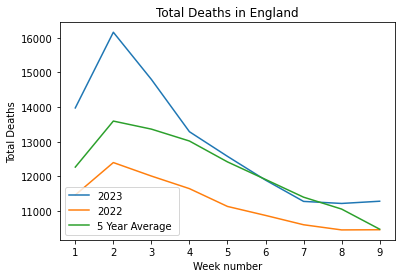

In [55]:
x1 = Deaths2022and2023['Week number']
y1 = Deaths2022and2023['Total deaths England (2023)']
y2 = Deaths2022and2023['Total deaths England (2022)']
y3 = Deaths2022and2023['Five-year average, England (2017 to 2019 and 2021, 2022)']

plt.plot(x1, y1, label = "2023")
plt.plot(x1, y2, label = "2022")
plt.plot(x1, y3, label = "5 Year Average ")
plt.title('Total Deaths in England')
plt.ylabel('Total Deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')

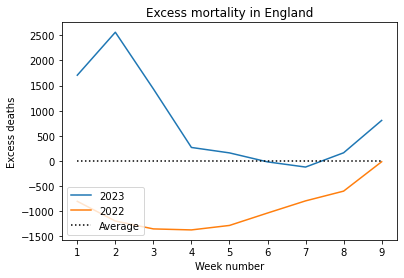

In [56]:
#Excess Mortality
#Calculate excess mortality 2023

EM23 = y1 - y3
EM22 = y2 - y3
zeroline = 0*x1

#Plot

plt.plot(x1, EM23, label = "2023")
plt.plot(x1, EM22, label = "2022")
plt.plot(x1, zeroline, label = "Average",ls='dotted',color = "k")
plt.title('Excess mortality in England')
plt.ylabel('Excess deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')

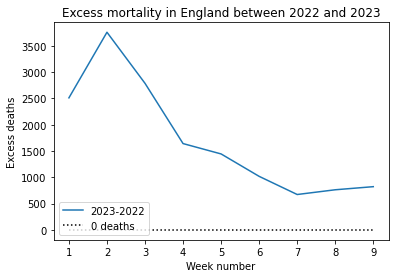

In [57]:
#Excess Mortality
#Calculate excess mortality 2023

EM22to23 = y1 - y2
zeroline = 0*x1

#Plot

plt.plot(x1, EM22to23, label = "2023-2022")
plt.plot(x1, zeroline, label = "0 deaths",ls='dotted',color = "k")
plt.title('Excess mortality in England between 2022 and 2023')
plt.ylabel('Excess deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')

## A4.2

### # Sheet 2: Weekly provisional figures on deaths registered in England and Wales by sex and age group, registered 2023

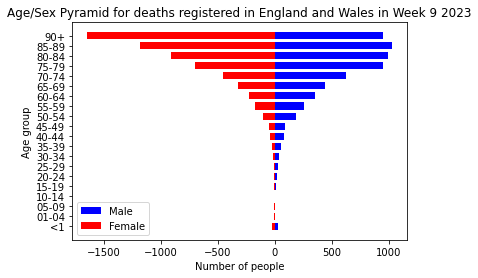

In [58]:
# Create the pyramid plot
fig, ax = plt.subplots()
ax.barh(age_groups_Age2023, male_population_Age2023, align='center', height=0.7, color='blue', label='Male')
ax.barh(age_groups_Age2023, [-i for i in female_population_Age2023], align='center', height=0.7, color='red', label='Female')
ax.set_xlabel('Number of people')
ax.set_ylabel('Age group')
ax.set_title('Age/Sex Pyramid for deaths registered in England and Wales in Week 9 2023')
ax.legend()

# Invert the y-axis to show younger age groups at the bottom
#ax.invert_yaxis()

# Show the plot
plt.show()

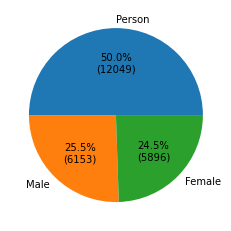

In [59]:
plt.pie(Pie_Age2023['All ages'], labels=Pie_Age2023['Sex'],autopct=lambda pct: piefunc(pct, Pie_Age2023['All ages']));

## A4.3

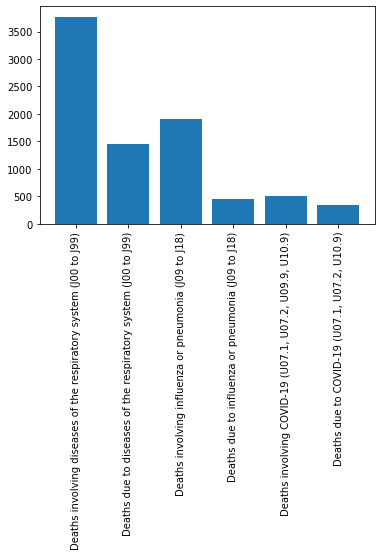

In [60]:
#Bar chart for Week 9
week9 = Cause_final['9']
x = Cause_final['Week number']

plt.bar(x, week9)
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

## A4.4

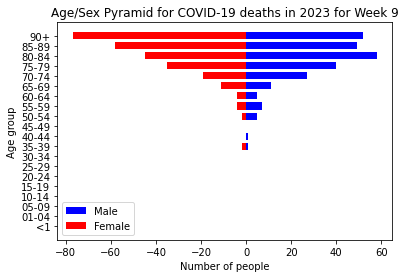

In [61]:
# Create the pyramid plot
fig, ax = plt.subplots()
ax.barh(CovidAge2023_age_groups, CovidAge2023_male, align='center', height=0.7, color='blue', label='Male')
ax.barh(CovidAge2023_age_groups, [-i for i in CovidAge2023_female], align='center', height=0.7, color='red', label='Female')
ax.set_xlabel('Number of people')
ax.set_ylabel('Age group')
ax.set_title('Age/Sex Pyramid for COVID-19 deaths in 2023 for Week 9')
ax.legend()

# Invert the y-axis to show younger age groups at the bottom
#ax.invert_yaxis()

# Show the plot
plt.show()

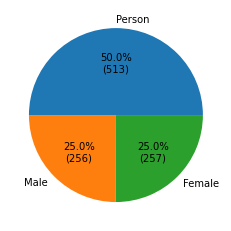

In [62]:
plt.pie(Pie_CovidAge2023['All ages'], labels=Pie_CovidAge2023['Sex'],autopct=lambda pct: piefunc(pct, Pie_CovidAge2023['All ages']));

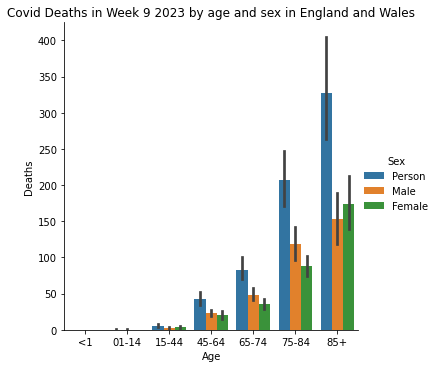

In [63]:
#Filter the DataFrame for week 9
CovidAge2023_bar = CovidAge2023[CovidAge2023['Week number'] == 9]
# Melt the DataFrame to convert it to long format
CovidAge2023_barfinish = UKCovidAge2023.melt(id_vars=['Week number', 'Week ending', 'Sex'], var_name='Age', value_name='Deaths')

sns.catplot(data=CovidAge2023_barfinish, x='Age', y='Deaths', hue='Sex', 
            kind='bar').set(title = 'Covid Deaths in Week 9 2023 by age and sex in England and Wales')
plt.show()

## A4.5

In [64]:
CovidDeaths2022and2023_occurence_person['Sex'] = 'Person'
CovidDeaths2022and2023_occurence_male['Sex'] = 'Male'
CovidDeaths2022and2023_occurence_female['Sex'] = 'Female'

CovidDeaths2022and2023_occurence = [CovidDeaths2022and2023_occurence_person, CovidDeaths2022and2023_occurence_male, CovidDeaths2022and2023_occurence_female]
CovidDeaths2022and2023_occurence = pd.concat(CovidDeaths2022and2023_occurence)

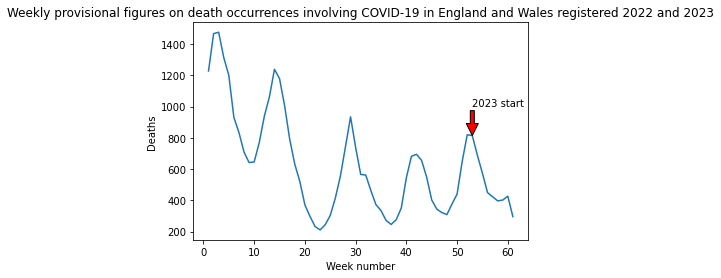

In [65]:
CovidDeaths2022and2023_occurence_person['Week Number Cont'] = range(1, len(CovidDeaths2022and2023_occurence_person) + 1)

CovidDeaths2022and2023_occurence_personx = CovidDeaths2022and2023_occurence_person['Week Number Cont']
CovidDeaths2022and2023_occurence_persony = CovidDeaths2022and2023_occurence_person['All ages']

plt.plot(CovidDeaths2022and2023_occurence_personx, CovidDeaths2022and2023_occurence_persony)
plt.title('Weekly provisional figures on death occurrences involving COVID-19 in England and Wales registered 2022 and 2023')
plt.ylabel('Deaths')
plt.xlabel('Week number')

point2023 = CovidDeaths2022and2023_occurence_persony[52]


plt.annotate('2023 start', 
             xy=(53,point2023), 
             xytext=(53, 1000), arrowprops=dict(facecolor='red'))

plt.show()


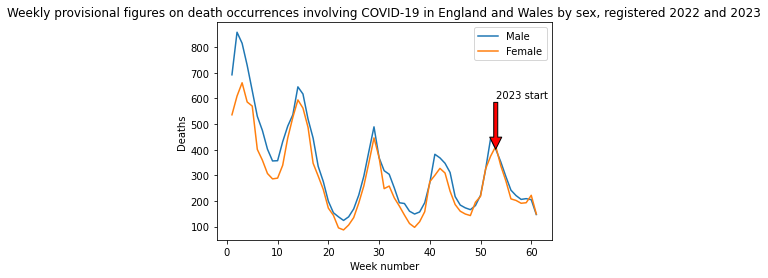

In [66]:
#female and male
CovidDeaths2022and2023_occurence_personx = CovidDeaths2022and2023_occurence_person['Week Number Cont']
CovidDeaths2022and2023_occurence_maley = CovidDeaths2022and2023_occurence_male['All ages']
CovidDeaths2022and2023_occurence_femaley = CovidDeaths2022and2023_occurence_female['All ages']

plt.plot(CovidDeaths2022and2023_occurence_personx, CovidDeaths2022and2023_occurence_maley,label = "Male")
plt.plot(CovidDeaths2022and2023_occurence_personx, CovidDeaths2022and2023_occurence_femaley,label = "Female")
plt.title('Weekly provisional figures on death occurrences involving COVID-19 in England and Wales by sex, registered 2022 and 2023')
plt.ylabel('Deaths')
plt.xlabel('Week number')

point2023 = CovidDeaths2022and2023_occurence_maley[52]

plt.annotate('2023 start', 
             xy=(53,point2023), 
             xytext=(53, 600), arrowprops=dict(facecolor='red'))
plt.legend()
plt.show()


## A4.6


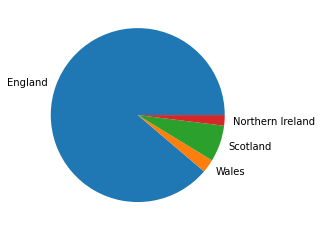

In [67]:
plt.pie(Deaths, labels=Country);

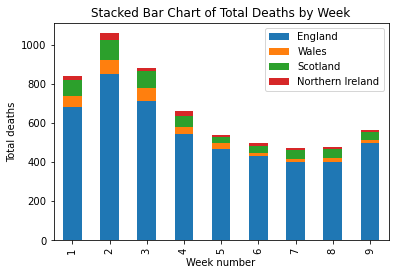

In [68]:
UKDeaths2022and2023_barchart = UKDeaths2022and2023.drop(columns=["England and Wales","Week ending","Total deaths"])
# Set the "Week number" as the index
UKDeaths2022and2023_barchart = UKDeaths2022and2023_barchart.set_index('Week number')

# Create the stacked bar chart
UKDeaths2022and2023_barchart.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Week number')
plt.ylabel('Total deaths')
plt.title('Stacked Bar Chart of Total Deaths by Week')

# Show the plot
plt.show()


## A4.7


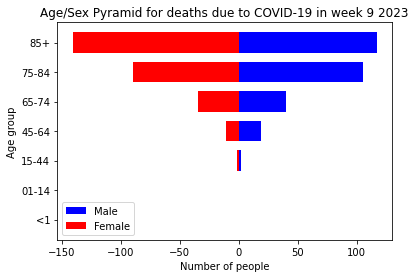

In [69]:
# Create the pyramid plot
fig, ax = plt.subplots()
ax.barh(UKCovidAge2023_age, UKCovidAge2023_male, align='center', height=0.7, color='blue', label='Male')
ax.barh(UKCovidAge2023_age, [-i for i in UKCovidAge2023_female], align='center', height=0.7, color='red', label='Female')
ax.set_xlabel('Number of people')
ax.set_ylabel('Age group')
ax.set_title('Age/Sex Pyramid for deaths due to COVID-19 in week 9 2023')
ax.legend()

# Invert the y-axis to show younger age groups at the bottom
#ax.invert_yaxis()

# Show the plot
plt.show()

In [70]:
# Filter the DataFrame for week 9
UKCovidAge2023_bar = UKCovidAge2023[UKCovidAge2023['Week number'] == 9]
# Melt the DataFrame to convert it to long format
UKCovidAge2023_barfinish = UKCovidAge2023.melt(id_vars=['Week number', 'Week ending', 'Sex'], var_name='Age', value_name='Deaths')


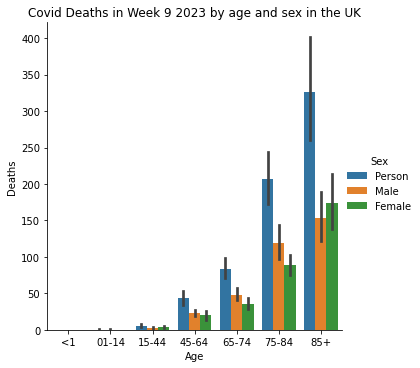

In [71]:
sns.catplot(data=UKCovidAge2023_barfinish, x='Age', y='Deaths', hue='Sex', 
            kind='bar').set(title = 'Covid Deaths in Week 9 2023 by age and sex in the UK')
plt.show()

## A4.8

In [72]:
Region2022and2023line = Region2022and2023
Region2022and2023line.insert(0, 'Day Number', range(1, 1 + len(Region2022and2023line)))

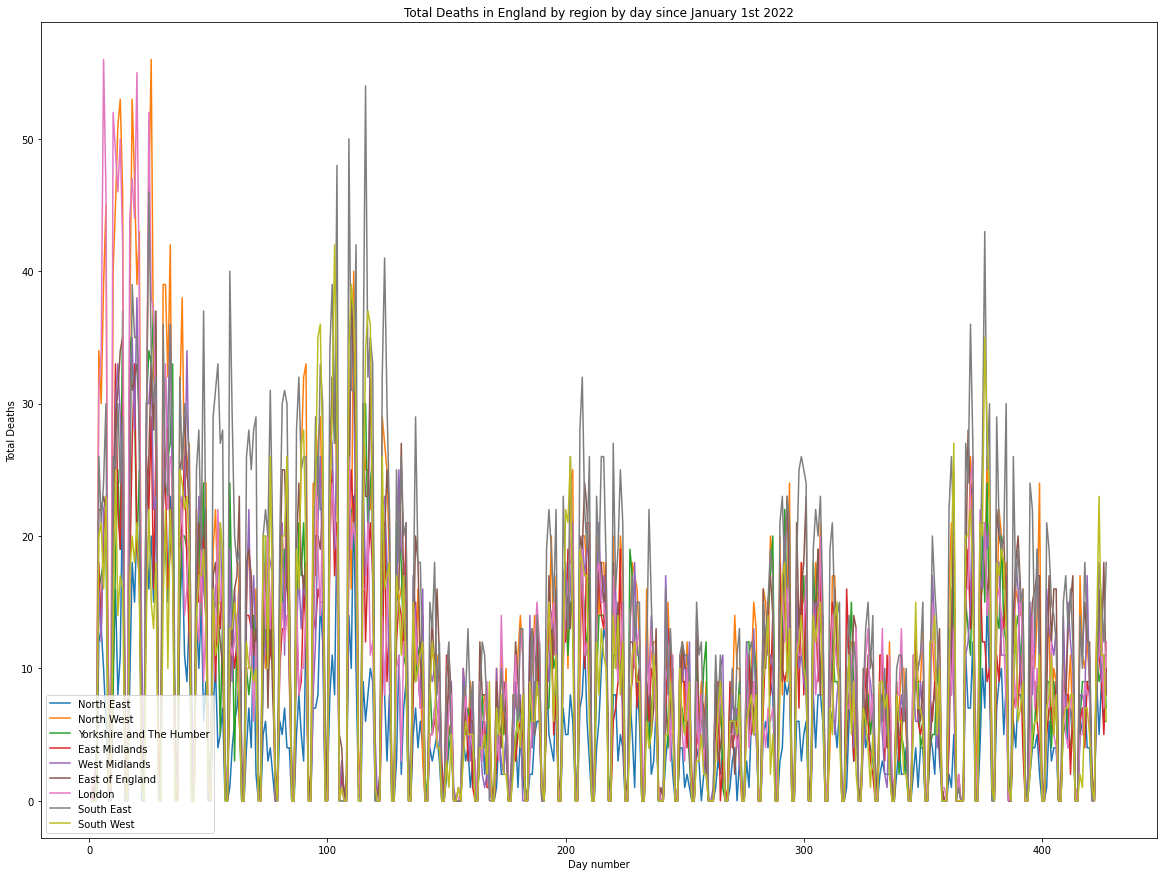

In [73]:
Region2022and2023linex = Region2022and2023['Day Number']

plt.figure(figsize=(20,15))
plt.plot(Region2022and2023linex, Region2022and2023line['North East'],label = "North East")
plt.plot(Region2022and2023linex, Region2022and2023line['North West'], label = "North West")
plt.plot(Region2022and2023linex, Region2022and2023line['Yorkshire and The Humber'], label = "Yorkshire and The Humber")
plt.plot(Region2022and2023linex, Region2022and2023line['East Midlands'], label = "East Midlands")
plt.plot(Region2022and2023linex, Region2022and2023line['West Midlands'], label = "West Midlands")
plt.plot(Region2022and2023linex, Region2022and2023line['East of England'], label = "East of England")
plt.plot(Region2022and2023linex, Region2022and2023line['London'], label = "London")
plt.plot(Region2022and2023linex, Region2022and2023line['South East'], label = "South East")
plt.plot(Region2022and2023linex, Region2022and2023line['South West'], label = "South West")
plt.title('Total Deaths in England by region by day since January 1st 2022')
plt.ylabel('Total Deaths')
plt.xlabel('Day number')
plt.legend(loc='lower left')

plt.show()

Text(0, 0.5, 'Deaths')

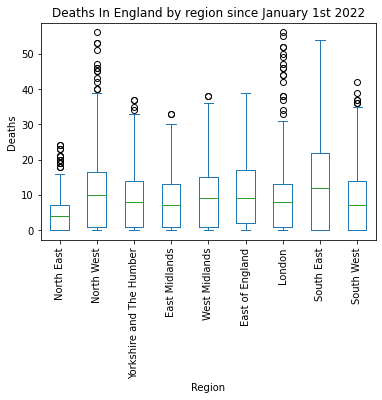

In [74]:
Region2022and2023box = Region2022and2023.drop(columns=['Date','UK','England and Wales','England','Wales','Scotland',
                                              'Northern Ireland','Day Number'])
Region2022and2023box.plot(kind='box',rot=90)
plt.title('Deaths In England by region since January 1st 2022')
plt.xlabel('Region')
plt.ylabel('Deaths')

## A4.9

In [75]:
Region2022and2023_Covidline = Region2022and2023_Covid
Region2022and2023_Covidline.insert(0, 'Day Number', range(1, 1 + len(Region2022and2023_Covidline)))

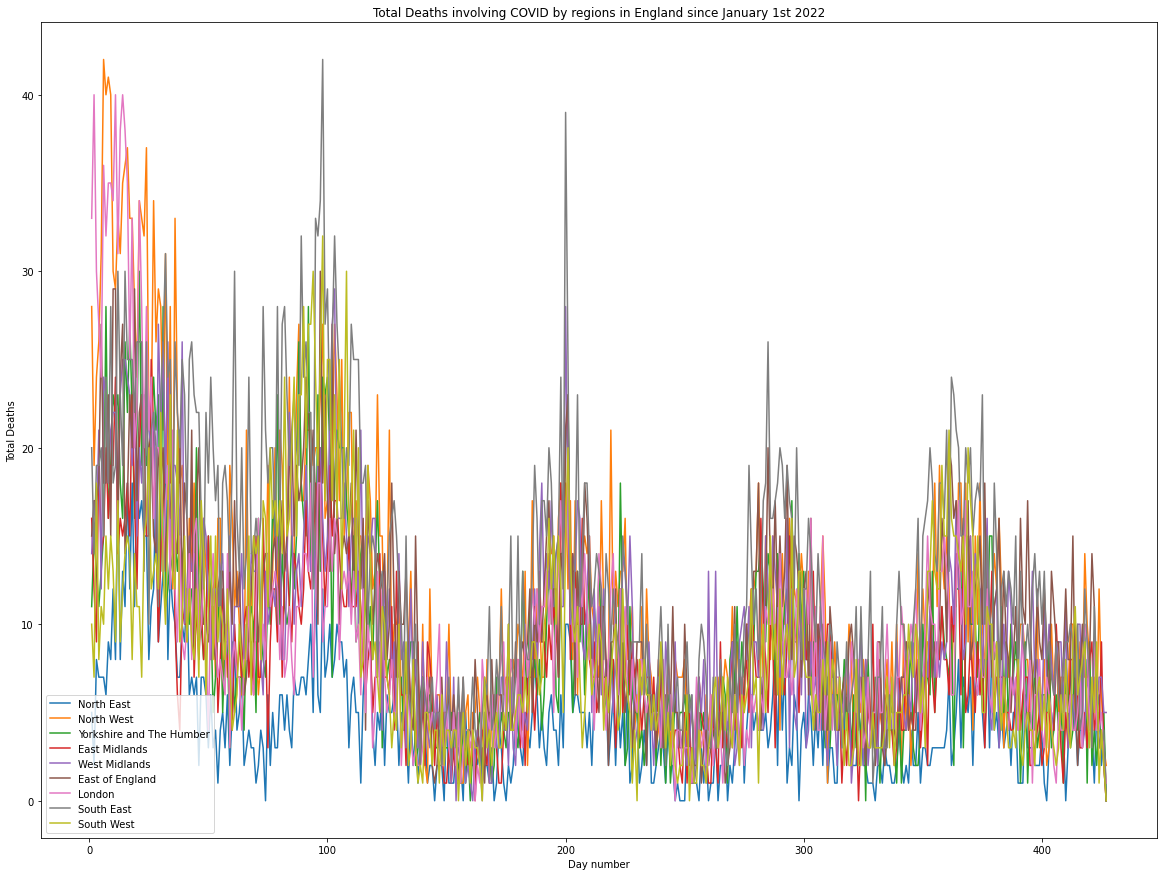

In [76]:
Region2022and2023_Covidlinex = Region2022and2023_Covidline['Day Number']

plt.figure(figsize=(20,15))
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['North East'],label = "North East")
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['North West'], label = "North West")
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['Yorkshire and The Humber'], label = "Yorkshire and The Humber")
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['East Midlands'], label = "East Midlands")
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['West Midlands'], label = "West Midlands")
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['East of England'], label = "East of England")
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['London'], label = "London")
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['South East'], label = "South East")
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['South West'], label = "South West")
plt.title('Total Deaths involving COVID by regions in England since January 1st 2022')
plt.ylabel('Total Deaths')
plt.xlabel('Day number')
plt.legend(loc='lower left')

plt.show()

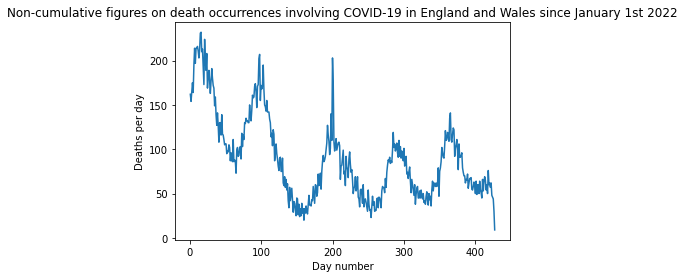

In [77]:
plt.plot(Region2022and2023_Covidlinex, Region2022and2023_Covidline['England and Wales'])
plt.title('Non-cumulative figures on death occurrences involving COVID-19 in England and Wales since January 1st 2022')
plt.ylabel('Deaths per day')
plt.xlabel('Day number')

plt.show()

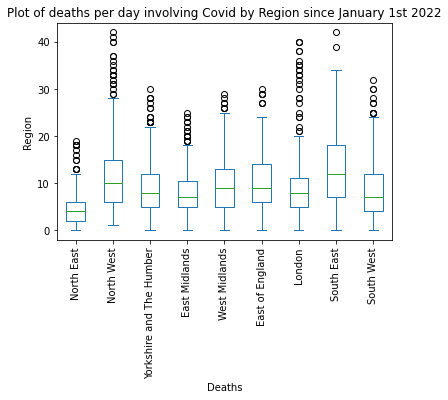

In [78]:
Region2022and2023_Covidlinebox = Region2022and2023_Covid.drop(columns=['Date','UK','England and Wales','England','Wales','Scotland',
                                              'Northern Ireland','Day Number'])
Region2022and2023_Covidlinebox.plot(kind='box',rot=90)
plt.title('Plot of deaths per day involving Covid by Region since January 1st 2022')
plt.xlabel('Deaths')
plt.ylabel('Region')
plt.show()

## A4.10

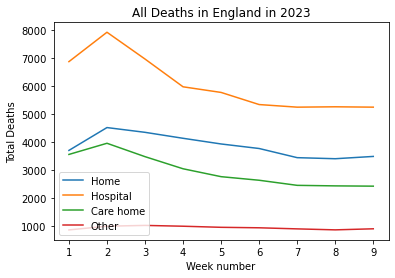

In [79]:
ExcessDeathsbyPlacex = ExcessDeathsbyPlace['Week number']

plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Home All deaths'], label = "Home")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Hospital All deaths'], label = "Hospital")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Care home All deaths'], label = "Care home")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Other All deaths'], label = "Other")
plt.title('All Deaths in England in 2023')
plt.ylabel('Total Deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')
plt.show()

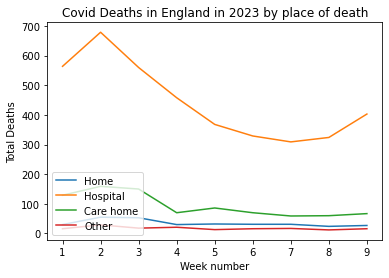

In [80]:
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Home COVID-19 deaths'], label = "Home")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Hospital COVID-19 deaths'], label = "Hospital")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Care home COVID-19 deaths'], label = "Care home")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Other COVID-19 deaths'], label = "Other")
plt.title('Covid Deaths in England in 2023 by place of death')
plt.ylabel('Total Deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')
plt.show()

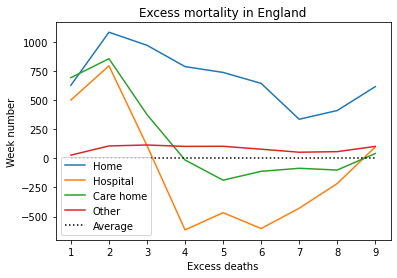

In [81]:
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Home Excess deaths'], label = "Home")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Hospital Excess deaths'], label = "Hospital")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Care home Excess deaths'], label = "Care home")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Other Excess deaths'], label = "Other")
zeroline = 0*ExcessDeathsbyPlace['Week number']
plt.plot(ExcessDeathsbyPlace['Week number'], zeroline, label = "Average",ls='dotted',color = "k")
plt.title('Excess mortality in England')
plt.xlabel('Excess deaths')
plt.ylabel('Week number')
plt.legend(loc='lower left')
plt.show()

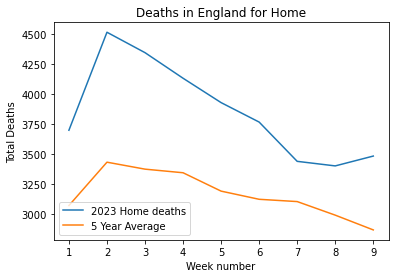

In [82]:
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Home All deaths'], label = "2023 Home deaths")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Home Five-year average'], label = "5 Year Average")
plt.title('Deaths in England for Home')
plt.ylabel('Total Deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')
plt.show()

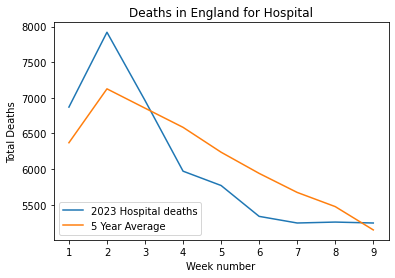

In [83]:
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Hospital All deaths'], label = "2023 Hospital deaths")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Hospital Five-year average'], label = "5 Year Average")
plt.title('Deaths in England for Hospital')
plt.ylabel('Total Deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')
plt.show()

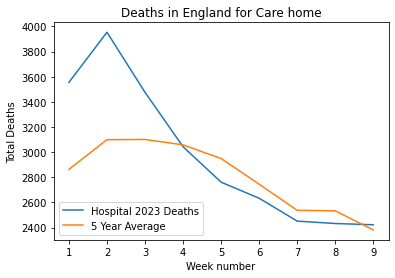

In [84]:
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Care home All deaths'], label = "Hospital 2023 Deaths")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Care home Five-year average'], label = "5 Year Average")
plt.title('Deaths in England for Care home')
plt.ylabel('Total Deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')
plt.show()

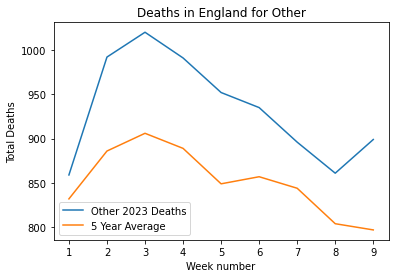

In [85]:
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Other All deaths'], label = "Other 2023 Deaths")
plt.plot(ExcessDeathsbyPlacex, ExcessDeathsbyPlace['Other Five-year average'], label = "5 Year Average")
plt.title('Deaths in England for Other')
plt.ylabel('Total Deaths')
plt.xlabel('Week number')
plt.legend(loc='lower left')
plt.show()

## A4.11.1

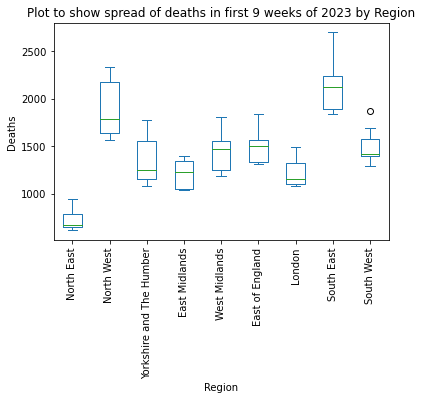

In [86]:
RegionAllCause_box = RegionAllCause.drop(columns=['Week number', 'Week ending','Wales'])
RegionAllCause_box.plot(kind='box',rot=90)
plt.title('Plot to show spread of deaths in first 9 weeks of 2023 by Region')
plt.xlabel('Region')
plt.ylabel('Deaths')
plt.show()

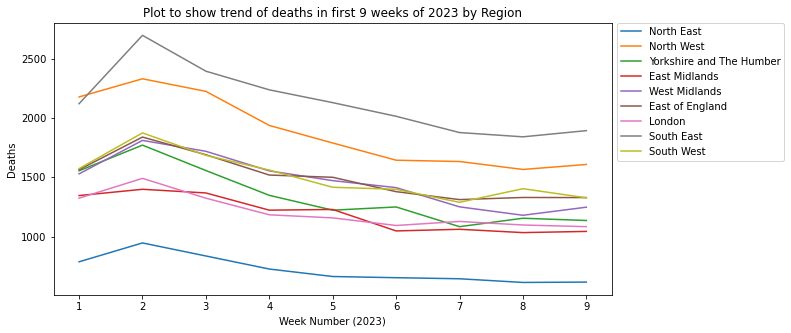

In [87]:
RegionAllCause_line = RegionAllCause
RegionAllCause_linex = RegionAllCause_line['Week number']

plt.figure(figsize=(10,5))
plt.plot(RegionAllCause_linex, RegionAllCause_line['North East'],label = "North East")
plt.plot(RegionAllCause_linex, RegionAllCause_line['North West'], label = "North West")
plt.plot(RegionAllCause_linex, RegionAllCause_line['Yorkshire and The Humber'], label = "Yorkshire and The Humber")
plt.plot(RegionAllCause_linex, RegionAllCause_line['East Midlands'], label = "East Midlands")
plt.plot(RegionAllCause_linex, RegionAllCause_line['West Midlands'], label = "West Midlands")
plt.plot(RegionAllCause_linex, RegionAllCause_line['East of England'], label = "East of England")
plt.plot(RegionAllCause_linex, RegionAllCause_line['London'], label = "London")
plt.plot(RegionAllCause_linex, RegionAllCause_line['South East'], label = "South East")
plt.plot(RegionAllCause_linex, RegionAllCause_line['South West'], label = "South West")
plt.title('Plot to show trend of deaths in first 9 weeks of 2023 by Region')
plt.ylabel('Deaths')
plt.xlabel('Week Number (2023)')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

## A4.11.2

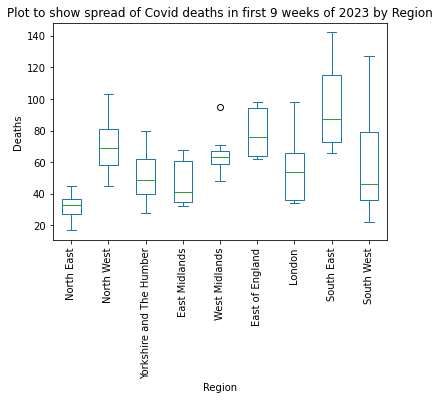

In [88]:
RegionAllCauseCOVID_box = RegionAllCauseCOVID.drop(columns=['Week number', 'Week ending','Wales'])
RegionAllCauseCOVID_box.plot(kind='box',rot=90)
plt.title('Plot to show spread of Covid deaths in first 9 weeks of 2023 by Region')
plt.xlabel('Region')
plt.ylabel('Deaths')
plt.show()

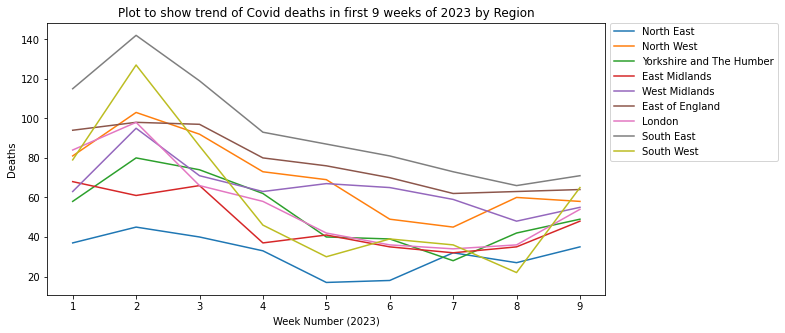

In [89]:
RegionAllCauseCOVIDline = RegionAllCauseCOVID
RegionAllCauseCOVIDlinex = RegionAllCauseCOVIDline['Week number']

plt.figure(figsize=(10,5))
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['North East'],label = "North East")
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['North West'], label = "North West")
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['Yorkshire and The Humber'], label = "Yorkshire and The Humber")
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['East Midlands'], label = "East Midlands")
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['West Midlands'], label = "West Midlands")
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['East of England'], label = "East of England")
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['London'], label = "London")
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['South East'], label = "South East")
plt.plot(RegionAllCauseCOVIDlinex, RegionAllCauseCOVIDline['South West'], label = "South West")
plt.title('Plot to show trend of Covid deaths in first 9 weeks of 2023 by Region')
plt.ylabel('Deaths')
plt.xlabel('Week Number (2023)')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

## A4.12

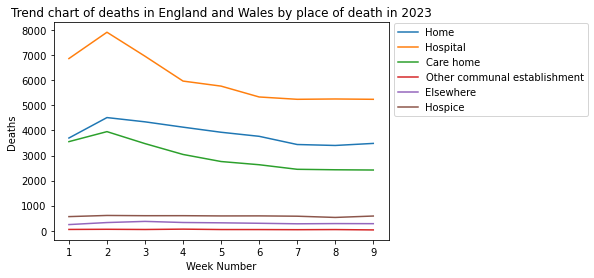

In [90]:
Deaths2020to2023_EngandWalesline = Deaths2020to2023_EngandWales[~(Deaths2020to2023_EngandWales['Week number'] == 'Week 1 2020 to Current Week')]

Deaths2020to2023_EngandWaleslinex = Deaths2020to2023_EngandWalesline['Week number']

#plt.plot(Deaths2020to2023_EngandWaleslinex, Deaths2020to2023_EngandWalesline['Total deaths'], label = "Total deaths")
plt.plot(Deaths2020to2023_EngandWaleslinex, Deaths2020to2023_EngandWalesline['Home'], label = "Home")
plt.plot(Deaths2020to2023_EngandWaleslinex, Deaths2020to2023_EngandWalesline['Hospital'], label = "Hospital")
plt.plot(Deaths2020to2023_EngandWaleslinex, Deaths2020to2023_EngandWalesline['Care home'], label = "Care home")
plt.plot(Deaths2020to2023_EngandWaleslinex, Deaths2020to2023_EngandWalesline['Other communal establishment'], label = "Other communal establishment")
plt.plot(Deaths2020to2023_EngandWaleslinex, Deaths2020to2023_EngandWalesline['Elsewhere'], label = "Elsewhere")
plt.plot(Deaths2020to2023_EngandWaleslinex, Deaths2020to2023_EngandWalesline['Hospice'], label = "Hospice")



plt.title('Trend chart of deaths in England and Wales by place of death in 2023')
plt.ylabel('Deaths')
plt.xlabel('Week Number')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

/Users/tobyjohnstone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


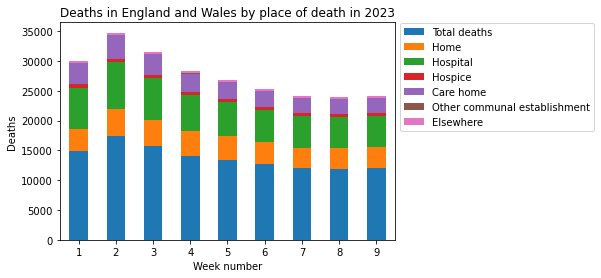

In [91]:
ax = Deaths2020to2023_EngandWalesline.plot(x="Week number", y=["Total deaths","Home", "Hospital", "Hospice","Care home","Other communal establishment",
                                            "Elsewhere"], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Deaths in England and Wales by place of death in 2023')
plt.ylabel('Deaths')
plt.show()

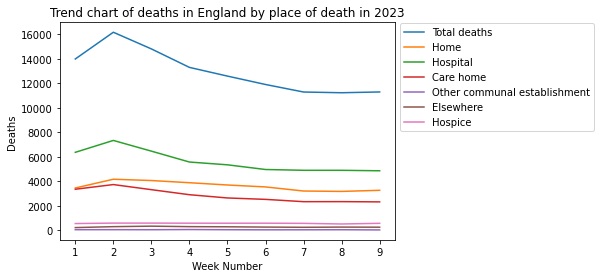

In [92]:
Deaths2020to2023_Engandline = Deaths2020to2023_Engand[~(Deaths2020to2023_Engand['Week number'] == 'Week 1 2020 to Current Week')]

Deaths2020to2023_Engandlinex = Deaths2020to2023_Engandline['Week number']

plt.plot(Deaths2020to2023_Engandlinex, Deaths2020to2023_Engandline['Total deaths'], label = "Total deaths")
plt.plot(Deaths2020to2023_Engandlinex, Deaths2020to2023_Engandline['Home'], label = "Home")
plt.plot(Deaths2020to2023_Engandlinex, Deaths2020to2023_Engandline['Hospital'], label = "Hospital")
plt.plot(Deaths2020to2023_Engandlinex, Deaths2020to2023_Engandline['Care home'], label = "Care home")
plt.plot(Deaths2020to2023_Engandlinex, Deaths2020to2023_Engandline['Other communal establishment'], label = "Other communal establishment")
plt.plot(Deaths2020to2023_Engandlinex, Deaths2020to2023_Engandline['Elsewhere'], label = "Elsewhere")
plt.plot(Deaths2020to2023_Engandlinex, Deaths2020to2023_Engandline['Hospice'], label = "Hospice")



plt.title('Trend chart of deaths in England by place of death in 2023')
plt.ylabel('Deaths')
plt.xlabel('Week Number')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()


/Users/tobyjohnstone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


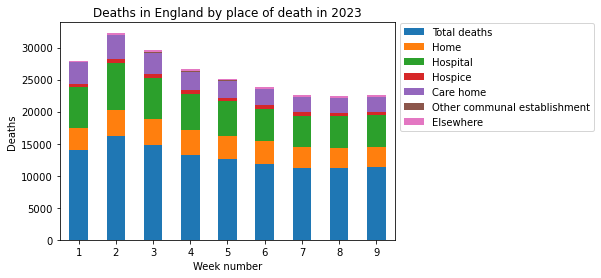

In [93]:
ax = Deaths2020to2023_Engandline.plot(x="Week number", y=["Total deaths","Home", "Hospital", "Hospice","Care home","Other communal establishment",
                                            "Elsewhere"], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Deaths in England by place of death in 2023')
plt.ylabel('Deaths')
plt.show()

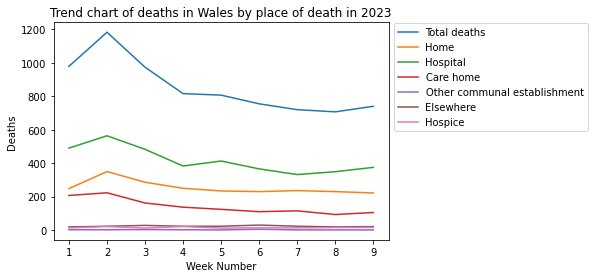

In [94]:
Deaths2020to2023_Walesline = Deaths2020to2023_Wales[~(Deaths2020to2023_Wales['Week number'] == 'Week 1 2020 to Current Week')]

Deaths2020to2023_Waleslinex = Deaths2020to2023_Walesline['Week number']

plt.plot(Deaths2020to2023_Waleslinex, Deaths2020to2023_Walesline['Total deaths'], label = "Total deaths")
plt.plot(Deaths2020to2023_Waleslinex, Deaths2020to2023_Walesline['Home'], label = "Home")
plt.plot(Deaths2020to2023_Waleslinex, Deaths2020to2023_Walesline['Hospital'], label = "Hospital")
plt.plot(Deaths2020to2023_Waleslinex, Deaths2020to2023_Walesline['Care home'], label = "Care home")
plt.plot(Deaths2020to2023_Waleslinex, Deaths2020to2023_Walesline['Other communal establishment'], label = "Other communal establishment")
plt.plot(Deaths2020to2023_Waleslinex, Deaths2020to2023_Walesline['Elsewhere'], label = "Elsewhere")
plt.plot(Deaths2020to2023_Waleslinex, Deaths2020to2023_Walesline['Hospice'], label = "Hospice")



plt.title('Trend chart of deaths in Wales by place of death in 2023')
plt.ylabel('Deaths')
plt.xlabel('Week Number')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

/Users/tobyjohnstone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


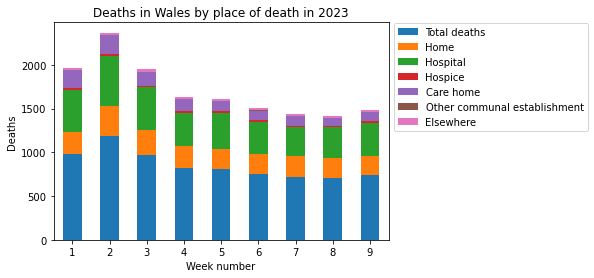

In [95]:
ax = Deaths2020to2023_Walesline.plot(x="Week number", y=["Total deaths","Home", "Hospital", "Hospice","Care home","Other communal establishment",
                                            "Elsewhere"], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Deaths in Wales by place of death in 2023')
plt.ylabel('Deaths')
plt.show()

## A4.13


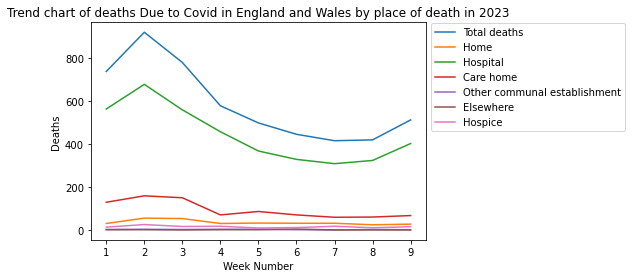

In [96]:
Deaths2020to2023Covid_EngandWalesline = Deaths2020to2023Covid_EngandWales[~(Deaths2020to2023Covid_EngandWales['Week number'] == 'Week 1 2020 to Current Week')]

Deaths2020to2023Covid_EngandWaleslinex = Deaths2020to2023Covid_EngandWalesline['Week number']

plt.plot(Deaths2020to2023Covid_EngandWaleslinex, Deaths2020to2023Covid_EngandWalesline['Total deaths'], label = "Total deaths")
plt.plot(Deaths2020to2023Covid_EngandWaleslinex, Deaths2020to2023Covid_EngandWalesline['Home'], label = "Home")
plt.plot(Deaths2020to2023Covid_EngandWaleslinex, Deaths2020to2023Covid_EngandWalesline['Hospital'], label = "Hospital")
plt.plot(Deaths2020to2023Covid_EngandWaleslinex, Deaths2020to2023Covid_EngandWalesline['Care home'], label = "Care home")
plt.plot(Deaths2020to2023Covid_EngandWaleslinex, Deaths2020to2023Covid_EngandWalesline['Other communal establishment'], label = "Other communal establishment")
plt.plot(Deaths2020to2023Covid_EngandWaleslinex, Deaths2020to2023Covid_EngandWalesline['Elsewhere'], label = "Elsewhere")
plt.plot(Deaths2020to2023Covid_EngandWaleslinex, Deaths2020to2023Covid_EngandWalesline['Hospice'], label = "Hospice")



plt.title('Trend chart of deaths Due to Covid in England and Wales by place of death in 2023')
plt.ylabel('Deaths')
plt.xlabel('Week Number')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

/Users/tobyjohnstone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


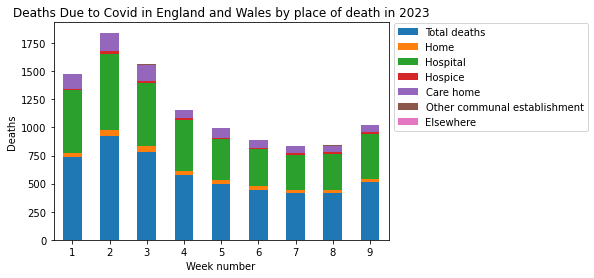

In [97]:
ax = Deaths2020to2023Covid_EngandWalesline.plot(x="Week number", y=["Total deaths","Home", "Hospital", "Hospice","Care home","Other communal establishment",
                                            "Elsewhere"], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Deaths Due to Covid in England and Wales by place of death in 2023')
plt.ylabel('Deaths')
plt.show()

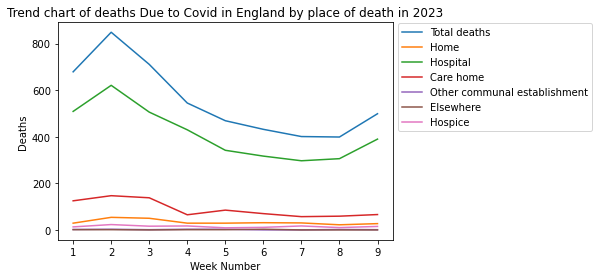

In [98]:
Deaths2020to2023Covid_Engline = Deaths2020to2023Covid_Eng[~(Deaths2020to2023Covid_Eng['Week number'] == 'Week 1 2020 to Current Week')]

Deaths2020to2023Covid_Englinex = Deaths2020to2023Covid_Engline['Week number']

plt.plot(Deaths2020to2023Covid_Englinex, Deaths2020to2023Covid_Engline['Total deaths'], label = "Total deaths")
plt.plot(Deaths2020to2023Covid_Englinex, Deaths2020to2023Covid_Engline['Home'], label = "Home")
plt.plot(Deaths2020to2023Covid_Englinex, Deaths2020to2023Covid_Engline['Hospital'], label = "Hospital")
plt.plot(Deaths2020to2023Covid_Englinex, Deaths2020to2023Covid_Engline['Care home'], label = "Care home")
plt.plot(Deaths2020to2023Covid_Englinex, Deaths2020to2023Covid_Engline['Other communal establishment'], label = "Other communal establishment")
plt.plot(Deaths2020to2023Covid_Englinex, Deaths2020to2023Covid_Engline['Elsewhere'], label = "Elsewhere")
plt.plot(Deaths2020to2023Covid_Englinex, Deaths2020to2023Covid_Engline['Hospice'], label = "Hospice")



plt.title('Trend chart of deaths Due to Covid in England by place of death in 2023')
plt.ylabel('Deaths')
plt.xlabel('Week Number')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

/Users/tobyjohnstone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


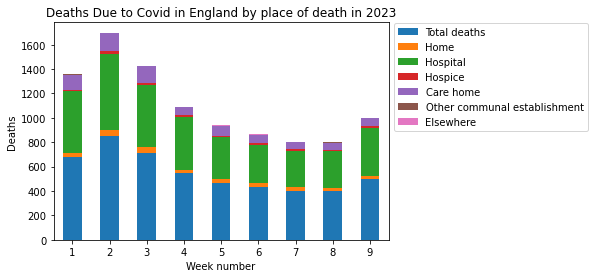

In [99]:
ax = Deaths2020to2023Covid_Engline.plot(x="Week number", y=["Total deaths","Home", "Hospital", "Hospice","Care home","Other communal establishment",
                                            "Elsewhere"], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Deaths Due to Covid in England by place of death in 2023')
plt.ylabel('Deaths')
plt.show()

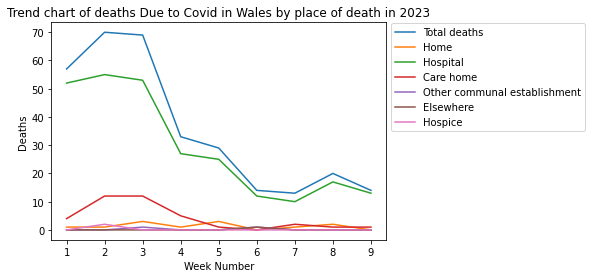

In [100]:
Deaths2020to2023Covid_Walesline = Deaths2020to2023Covid_Wales[~(Deaths2020to2023Covid_Wales['Week number'] == 'Week 1 2020 to Current Week')]

Deaths2020to2023Covid_Waleslinex = Deaths2020to2023Covid_Walesline['Week number']

plt.plot(Deaths2020to2023Covid_Waleslinex, Deaths2020to2023Covid_Walesline['Total deaths'], label = "Total deaths")
plt.plot(Deaths2020to2023Covid_Waleslinex, Deaths2020to2023Covid_Walesline['Home'], label = "Home")
plt.plot(Deaths2020to2023Covid_Waleslinex, Deaths2020to2023Covid_Walesline['Hospital'], label = "Hospital")
plt.plot(Deaths2020to2023Covid_Waleslinex, Deaths2020to2023Covid_Walesline['Care home'], label = "Care home")
plt.plot(Deaths2020to2023Covid_Waleslinex, Deaths2020to2023Covid_Walesline['Other communal establishment'], label = "Other communal establishment")
plt.plot(Deaths2020to2023Covid_Waleslinex, Deaths2020to2023Covid_Walesline['Elsewhere'], label = "Elsewhere")
plt.plot(Deaths2020to2023Covid_Waleslinex, Deaths2020to2023Covid_Walesline['Hospice'], label = "Hospice")



plt.title('Trend chart of deaths Due to Covid in Wales by place of death in 2023')
plt.ylabel('Deaths')
plt.xlabel('Week Number')
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

/Users/tobyjohnstone/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


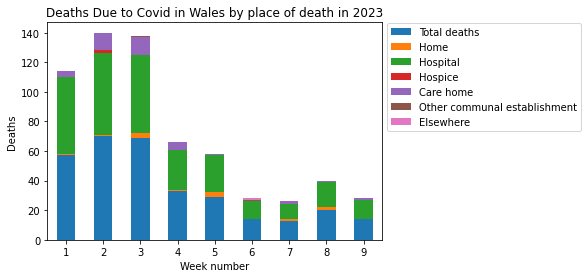

In [101]:
ax = Deaths2020to2023Covid_Walesline.plot(x="Week number", y=["Total deaths","Home", "Hospital", "Hospice","Care home","Other communal establishment",
                                            "Elsewhere"], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Deaths Due to Covid in Wales by place of death in 2023')
plt.ylabel('Deaths')
plt.show()